Dataset : https://www.kaggle.com/anmolkumar/health-insurance-cross-sell-prediction

In [106]:
#Import required libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from warnings import filterwarnings
filterwarnings('ignore')

In [107]:
#Read dataset from the local drive

df = pd.read_csv('Health Insurance Cross Sell Prediction.csv')
df.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


In [108]:
#Shape of the dataset
df.shape

(381109, 12)

In [109]:
#Data description
df.describe()

,id,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Response
count,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000
mean,190555.000000,38.822584,0.997869,26.388807,0.458210,30564.389581,112.034295,154.347397,0.122563
std,110016.836208,15.511611,0.046110,13.229888,0.498251,17213.155057,54.203995,83.671304,0.327936
min,1.000000,20.000000,0.000000,0.000000,0.000000,2630.000000,1.000000,10.000000,0.000000
25%,95278.000000,25.000000,1.000000,15.000000,0.000000,24405.000000,29.000000,82.000000,0.000000
50%,190555.000000,36.000000,1.000000,28.000000,0.000000,31669.000000,133.000000,154.000000,0.000000
75%,285832.000000,49.000000,1.000000,35.000000,1.000000,39400.000000,152.000000,227.000000,0.000000
max,381109.000000,85.000000,1.000000,52.000000,1.000000,540165.000000,163.000000,299.000000,1.000000


In [110]:
#Features and Data-types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381109 entries, 0 to 381108
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    381109 non-null  int64  
 1   Gender                381109 non-null  object 
 2   Age                   381109 non-null  int64  
 3   Driving_License       381109 non-null  int64  
 4   Region_Code           381109 non-null  float64
 5   Previously_Insured    381109 non-null  int64  
 6   Vehicle_Age           381109 non-null  object 
 7   Vehicle_Damage        381109 non-null  object 
 8   Annual_Premium        381109 non-null  float64
 9   Policy_Sales_Channel  381109 non-null  float64
 10  Vintage               381109 non-null  int64  
 11  Response              381109 non-null  int64  
dtypes: float64(3), int64(6), object(3)
memory usage: 34.9+ MB


In [111]:
#Some of the categorical features are in 'int' format so changing those features to 'object'
df[['id', 'Driving_License', 'Previously_Insured','Response' ]] = df[['id', 'Driving_License',  'Previously_Insured', 'Response' ]].astype('object')

In [112]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381109 entries, 0 to 381108
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    381109 non-null  object 
 1   Gender                381109 non-null  object 
 2   Age                   381109 non-null  int64  
 3   Driving_License       381109 non-null  object 
 4   Region_Code           381109 non-null  float64
 5   Previously_Insured    381109 non-null  object 
 6   Vehicle_Age           381109 non-null  object 
 7   Vehicle_Damage        381109 non-null  object 
 8   Annual_Premium        381109 non-null  float64
 9   Policy_Sales_Channel  381109 non-null  float64
 10  Vintage               381109 non-null  int64  
 11  Response              381109 non-null  object 
dtypes: float64(3), int64(2), object(7)
memory usage: 34.9+ MB


In [113]:
#Data description of numerical column
df.describe()

,Age,Region_Code,Annual_Premium,Policy_Sales_Channel,Vintage
count,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000
mean,38.822584,26.388807,30564.389581,112.034295,154.347397
std,15.511611,13.229888,17213.155057,54.203995,83.671304
min,20.000000,0.000000,2630.000000,1.000000,10.000000
25%,25.000000,15.000000,24405.000000,29.000000,82.000000
50%,36.000000,28.000000,31669.000000,133.000000,154.000000
75%,49.000000,35.000000,39400.000000,152.000000,227.000000
max,85.000000,52.000000,540165.000000,163.000000,299.000000


In [114]:
#Data description of categorical column
df.select_dtypes(exclude='number').describe()

,id,Gender,Driving_License,Previously_Insured,Vehicle_Age,Vehicle_Damage,Response
count,381109,381109,381109,381109,381109,381109,381109
unique,381109,2,2,2,3,2,2
top,381109,Male,1,0,1-2 Year,Yes,0
freq,1,206089,380297,206481,200316,192413,334399


In [115]:
#Checking for Null values 

df.isnull().sum()
#There are no null values

id                      0
Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 0
Response                0
dtype: int64

In [116]:
#Checking for Duplicate records 

df.duplicated().value_counts()

False    381109
dtype: int64

# Exploratory Data Analysis
### Unvariate and MultiVariate Analysis

### Response feature

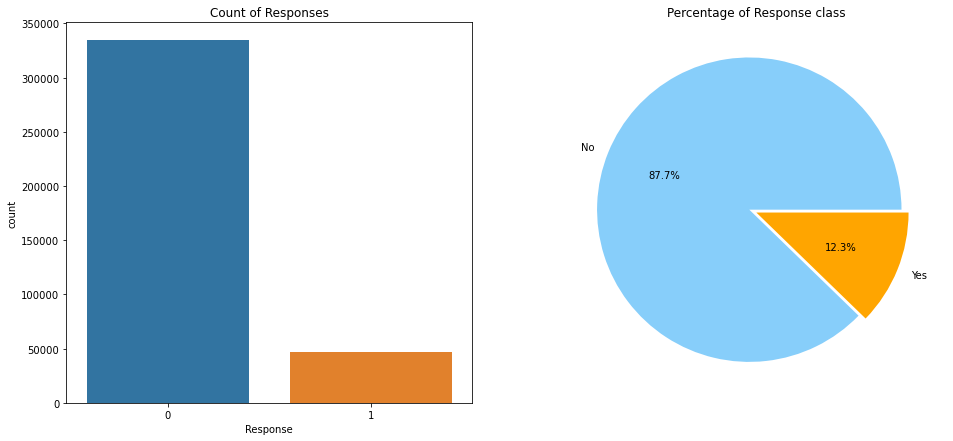

In [117]:
plt.figure(figsize=(16,7))

plt.subplot(1,2,1)
plt.title('Count of Responses')
sns.countplot(df['Response'])

plt.subplot(1,2,2)
plt.pie(df['Response'].value_counts(), explode=[0.05,0] , colors=[ 'lightskyblue', 'orange'] ,autopct='%.1f%%', labels=['No', 'Yes'], labeldistance=1.1)
plt.title('Percentage of Response class')

plt.show()

### Gender feature

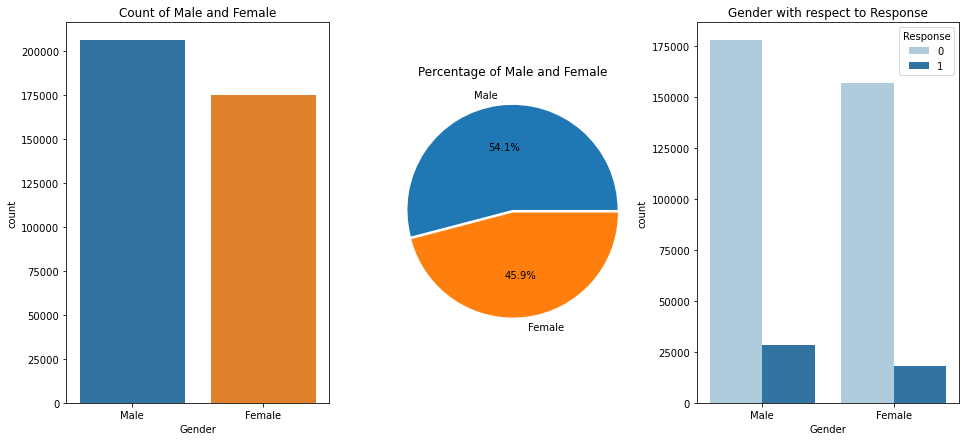

In [118]:
plt.figure(figsize=(16,7))

plt.subplot(1,3,1)
plt.title('Count of Male and Female')
sns.countplot(df['Gender'])

plt.subplot(1,3,2)
plt.pie(df['Gender'].value_counts(), explode=[0.025,0] ,autopct='%.1f%%', labels=['Male', 'Female'], labeldistance=1.1)
plt.title('Percentage of Male and Female')

plt.subplot(1,3 ,3)
sns.countplot(df['Gender'], hue=df['Response'], palette='Paired')
plt.title('Gender with respect to Response')

plt.show()

In [119]:
#Splitting Male & Female customers and analysing based on overall customers

male = df[df['Gender']=='Male']
female = df[df['Gender']=='Female']


count_response = []

#Count of customers who have not purchased/responded to vehicle insurance
count_response.append(df[df['Response'] == 0]['Response'].count())

#Count of customers who have purchased/responded to vehicle insurance and those who are Male customers
count_response.append(male[male['Response']==1]['Response'].count())

#Count of customers who have purchased/responded to vehicle insurance and those who are Female customers
count_response.append(female[female['Response']==1]['Response'].count())

count_response

[334399, 28525, 18185]

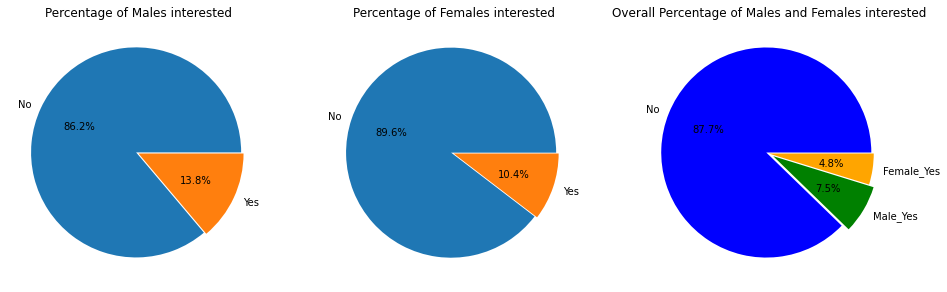

In [120]:
plt.figure(figsize=(16,7))

plt.subplot(1,3,1)
plt.pie(male['Response'].value_counts(), explode=[0.025,0] ,autopct='%.1f%%', labels=['No', 'Yes'], labeldistance=1.1)
plt.title('Percentage of Males interested')

plt.subplot(1,3,2)
plt.pie(female['Response'].value_counts(), explode=[0.025,0] ,autopct='%.1f%%', labels=['No', 'Yes'], labeldistance=1.1)
plt.title('Percentage of Females interested')

plt.subplot(1,3,3)
plt.pie(count_response, explode=[0.025,0.05, 0] ,colors=[ 'blue', 'green', 'orange'], autopct='%.1f%%', labels=['No', 'Male_Yes', 'Female_Yes'], labeldistance=1.1)
plt.title('Overall Percentage of Males and Females interested')

plt.show()

### Age feature

In [121]:
#Splitting the data based on customers who have responded
res_yes = df[df['Response']==1]
res_no = df[df['Response']==0]

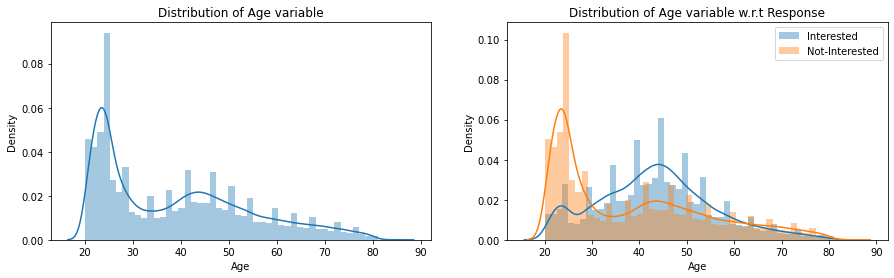

In [122]:
plt.figure(figsize=(15,4))

plt.subplot(1,2,1)
sns.distplot(df['Age'])
plt.title('Distribution of Age variable')

plt.subplot(1,2,2)
sns.distplot(res_yes['Age'], label='Interested')
sns.distplot(res_no['Age'], label='Not-Interested')
plt.title('Distribution of Age variable w.r.t Response')
plt.legend()

plt.show()

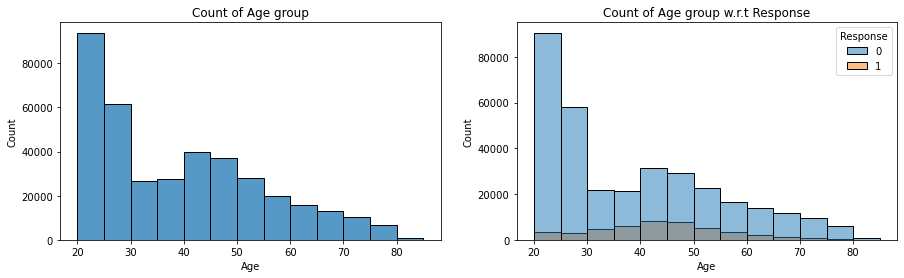

In [123]:
plt.figure(figsize=(15,4))

plt.subplot(1,2,1)
sns.histplot(df['Age'],bins=10, binwidth=5 )
plt.title('Count of Age group')

plt.subplot(1,2,2)
sns.histplot(data=df, x='Age', hue='Response' ,bins=10, binwidth=5 )
plt.title('Count of Age group w.r.t Response')

plt.show()

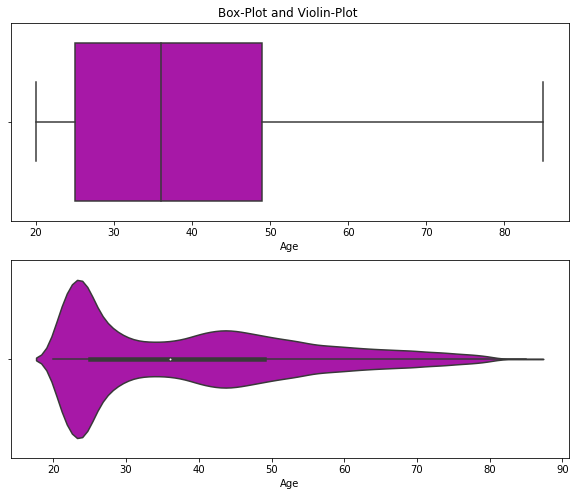

In [124]:
plt.figure(figsize=(10,8))

plt.subplot(2,1,1)
sns.boxplot(df['Age'], color='m')
plt.title('Box-Plot and Violin-Plot ')

plt.subplot(2,1,2)
sns.violinplot(df['Age'], color='m')

plt.show()

### Driving License feature

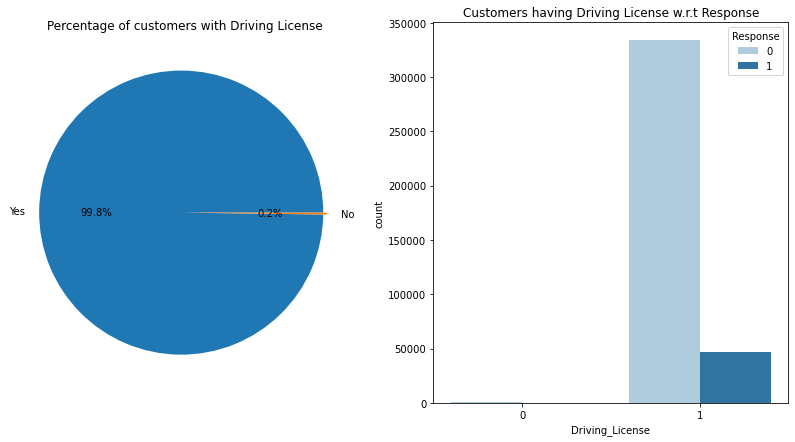

In [125]:
plt.figure(figsize=(14,7))

plt.subplot(1,2,1)
plt.pie(df['Driving_License'].value_counts(), explode=[0.025,0] ,autopct='%.1f%%', labels=['Yes', 'No'], labeldistance=1.1)
plt.title('Percentage of customers with Driving License')

plt.subplot(1,2 ,2)
sns.countplot(df['Driving_License'], hue=df['Response'], palette='Paired')
plt.title('Customers having Driving License w.r.t Response')

plt.show()

### Region_Code feature

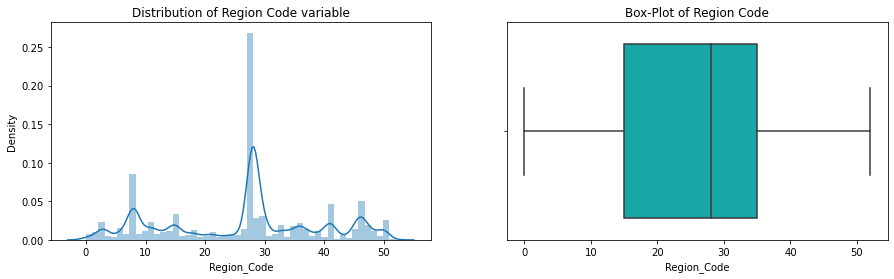

In [126]:
plt.figure(figsize=(15,4))

plt.subplot(1,2,1)
sns.distplot(df['Region_Code'])
plt.title('Distribution of Region Code variable')

plt.subplot(1,2,2)
sns.boxplot(df['Region_Code'], color='c')
plt.title('Box-Plot of Region Code')

plt.show()

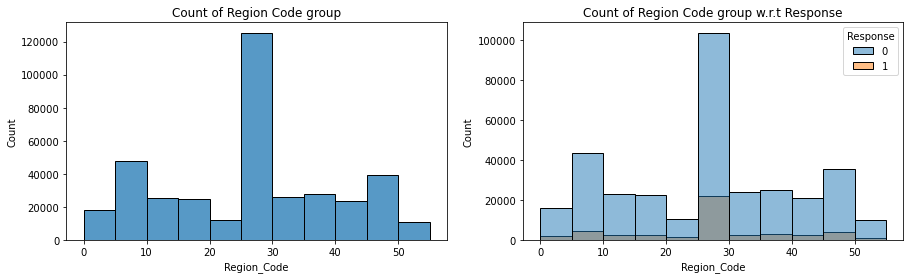

In [127]:
plt.figure(figsize=(15,4))

plt.subplot(1,2,1)
sns.histplot(df['Region_Code'], binwidth=5 )
plt.title('Count of Region Code group')

plt.subplot(1,2,2)
sns.histplot(data=df, x='Region_Code', hue='Response' , binwidth=5 )
plt.title('Count of Region Code group w.r.t Response')

plt.show()

### Previously Insured Feature

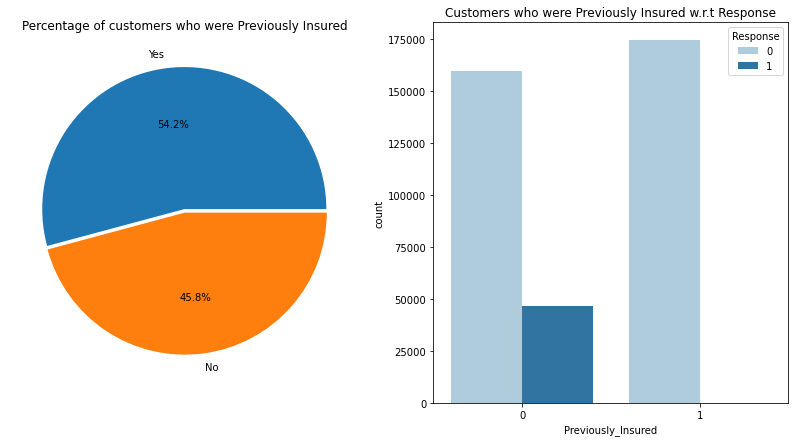

In [128]:
plt.figure(figsize=(14,7))

plt.subplot(1,2,1)
plt.pie(df['Previously_Insured'].value_counts(), explode=[0.025,0] ,autopct='%.1f%%', labels=['Yes', 'No'], labeldistance=1.1)
plt.title('Percentage of customers who were Previously Insured')

plt.subplot(1,2 ,2)
sns.countplot(df['Previously_Insured'], hue=df['Response'], palette='Paired')
plt.title('Customers who were Previously Insured w.r.t Response')

plt.show()

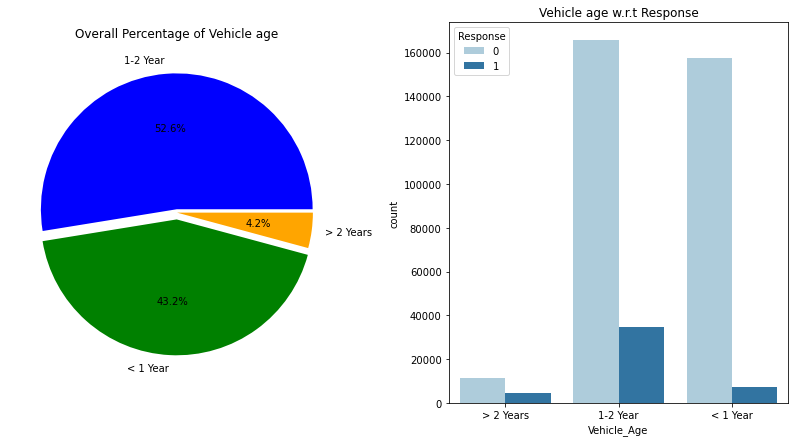

In [129]:
plt.figure(figsize=(14,7))

plt.subplots_adjust(wspace=0.3)

plt.subplot(1,2,1)
plt.pie(df['Vehicle_Age'].value_counts(), explode=[0.025,0.05, 0] ,colors=[ 'blue', 'green', 'orange'], autopct='%.1f%%', 
        labels=list(df['Vehicle_Age'].value_counts().index), labeldistance=1.1)
plt.title('Overall Percentage of Vehicle age')

plt.subplot(1,2 ,2)
sns.countplot(df['Vehicle_Age'], hue=df['Response'], palette='Paired')
plt.title('Vehicle age w.r.t Response')


plt.show()

### Vehicle Damage feature

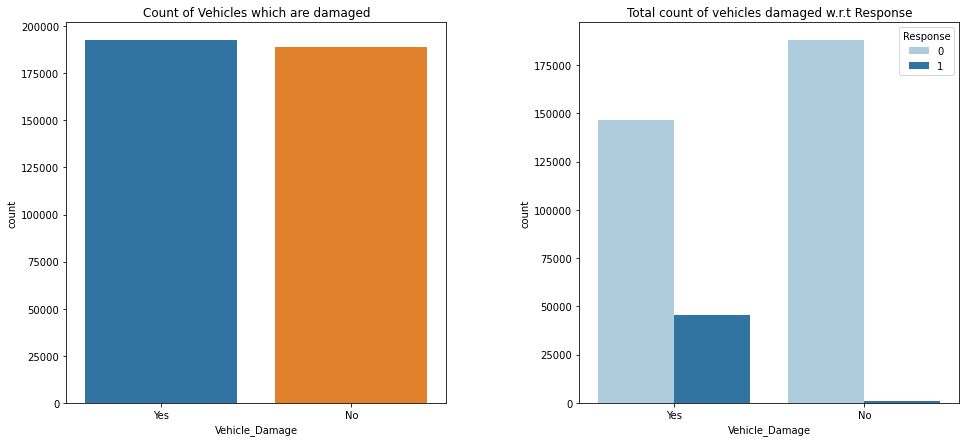

In [130]:
plt.figure(figsize=(16,7))

plt.subplots_adjust(wspace=0.35)

plt.subplot(1,2,1)
plt.title('Count of Vehicles which are damaged')
sns.countplot(df['Vehicle_Damage'])

plt.subplot(1,2 ,2)
sns.countplot(df['Vehicle_Damage'], hue=df['Response'], palette='Paired')
plt.title('Total count of vehicles damaged w.r.t Response')

plt.show()

### Annual Premium feature

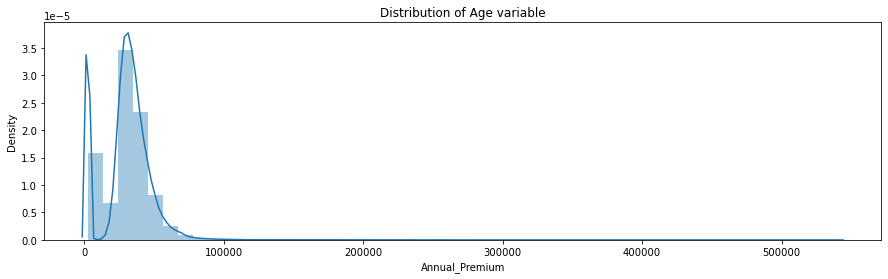

In [131]:
plt.figure(figsize=(15,4))

sns.distplot(df['Annual_Premium'])
plt.title('Distribution of Age variable')

plt.show()

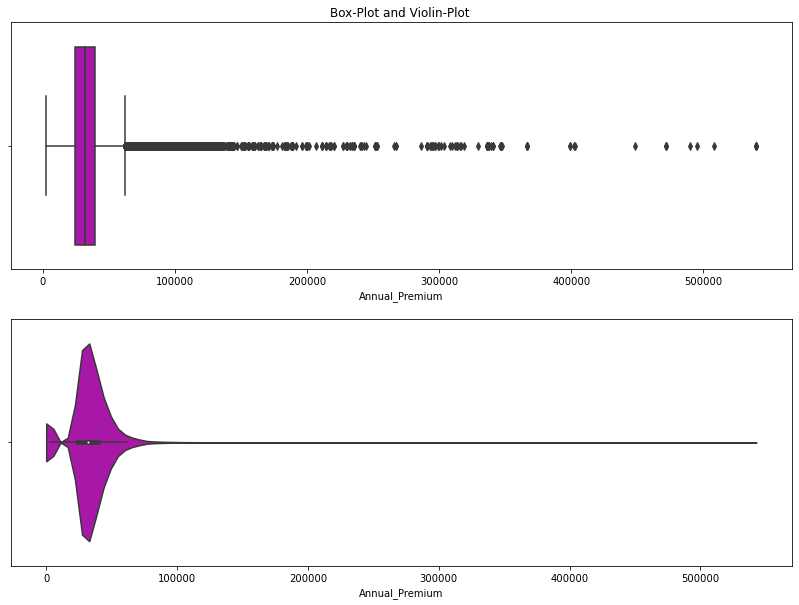

In [132]:
plt.figure(figsize=(14,10))

plt.subplot(2,1,1)
sns.boxplot(df['Annual_Premium'], color='m')
plt.title('Box-Plot and Violin-Plot ')

plt.subplot(2,1,2)
sns.violinplot(df['Annual_Premium'], color='m')

plt.show()

### Policy Sales Channel feature

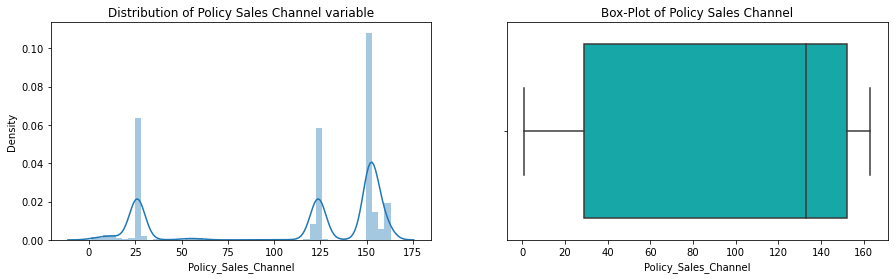

In [133]:
plt.figure(figsize=(15,4))

plt.subplot(1,2,1)
sns.distplot(df['Policy_Sales_Channel'])
plt.title('Distribution of Policy Sales Channel variable')

plt.subplot(1,2,2)
sns.boxplot(df['Policy_Sales_Channel'], color='c')
plt.title('Box-Plot of Policy Sales Channel')

plt.show()

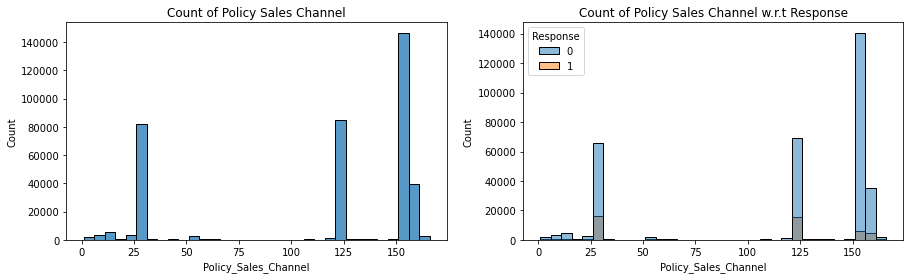

In [134]:
plt.figure(figsize=(15,4))

plt.subplot(1,2,1)
sns.histplot(df['Policy_Sales_Channel'], binwidth=5 )
plt.title('Count of Policy Sales Channel')

plt.subplot(1,2,2)
sns.histplot(data=df, x='Policy_Sales_Channel', hue='Response' , binwidth=5 )
plt.title('Count of Policy Sales Channel w.r.t Response')

plt.show()

### Vintage feature

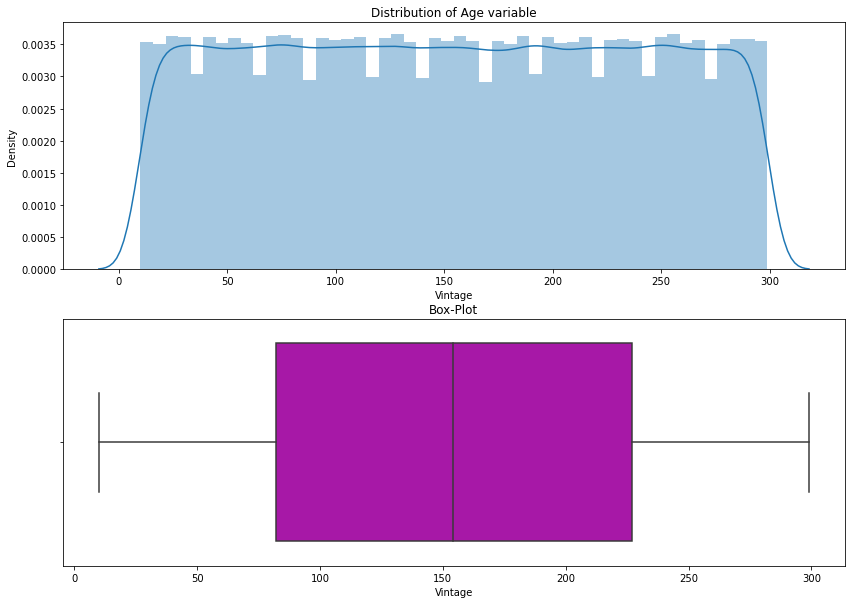

In [135]:
plt.figure(figsize=(14,10))

plt.subplot(2,1,1)
sns.distplot(df['Vintage'])
plt.title('Distribution of Age variable')

plt.subplot(2,1,2)
sns.boxplot(df['Vintage'], color='m')
plt.title('Box-Plot')

plt.show()

### Age vs Gender with respect to Response

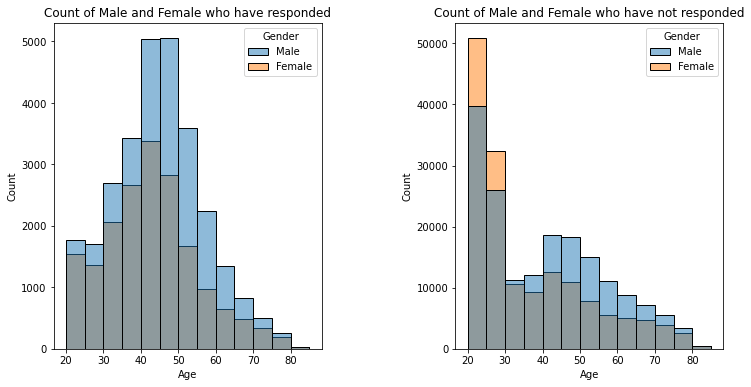

In [136]:
plt.figure(figsize=(12,6))
plt.subplots_adjust(wspace=0.5)

plt.subplot(1,2,1)
sns.histplot(data=res_yes, x='Age', hue='Gender', binwidth=5)
plt.title('Count of Male and Female who have responded')

plt.subplot(1,2,2)
sns.histplot(data=res_no, x='Age', hue='Gender', binwidth=5)
plt.title('Count of Male and Female who have not responded')
plt.show()

### Region Code vs Gender with respect to Response

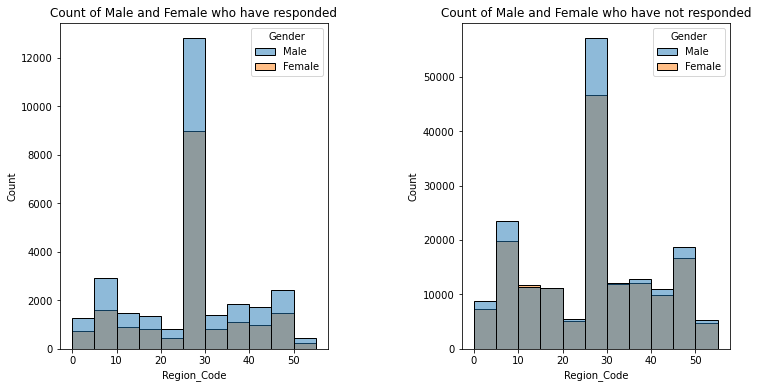

In [137]:
plt.figure(figsize=(12,6))
plt.subplots_adjust(wspace=0.5)

plt.subplot(1,2,1)
sns.histplot(data=res_yes, x='Region_Code', hue='Gender', binwidth=5)
plt.title('Count of Male and Female who have responded')

plt.subplot(1,2,2)
sns.histplot(data=res_no, x='Region_Code', hue='Gender', binwidth=5)
plt.title('Count of Male and Female who have not responded')
plt.show()

### Count of Previously Insured vs Gender with respect to Response

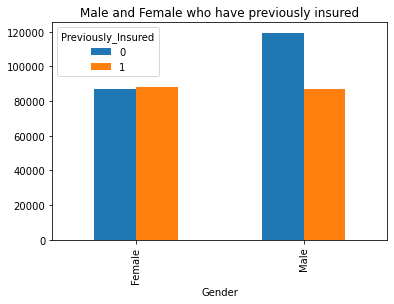

In [138]:
pd.crosstab(index=df['Gender'], columns=df['Previously_Insured']).plot(kind='bar')
plt.title('Male and Female who have previously insured')
plt.show()

### Count of Vehicle Age vs Gender with respect to Response

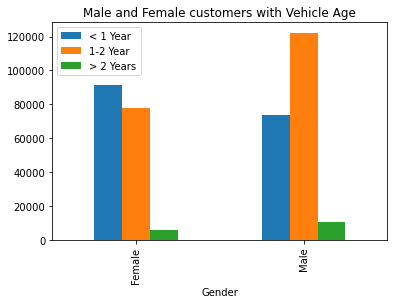

In [139]:
pd.crosstab(index=df['Gender'], columns=df['Vehicle_Age']).sort_values(by='Female', axis=1, ascending=False).plot(kind='bar')
plt.legend(loc=2)
plt.title('Male and Female customers with Vehicle Age')
plt.show()

### Corelation plot

In [140]:
cor = df.iloc[:, 1:].corr()

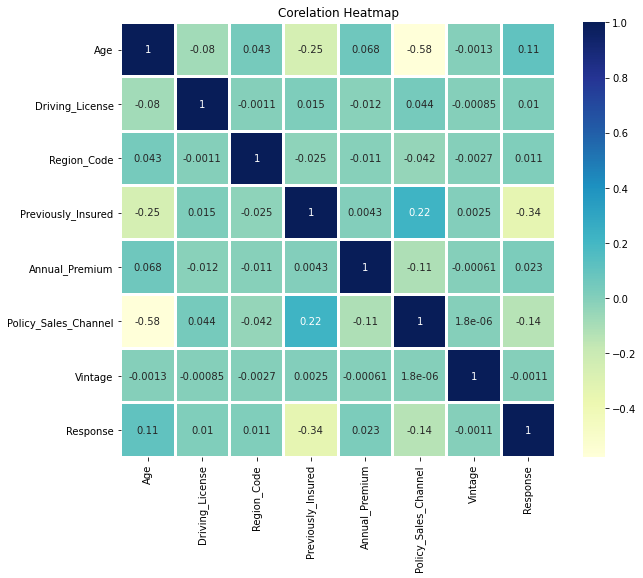

In [105]:
plt.figure(figsize=(10,8))
sns.heatmap(cor,linewidths=2,square=True, annot=True, cmap='YlGnBu')
plt.title('Corelation Heatmap')
plt.show()

# Data Pre-processing

### Removing in-significant variables which are not useful 

In [33]:
# Id is in-significant, we will remove that column

df.drop('id', axis=1, inplace=True)
df.head(2)

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0


### Duplicate records

In [34]:
# Check for duplicates
df.duplicated(keep='first').value_counts()

#269 records are duplicated, We are keeping the first record and deleting the rest of duplicate records
#We found out there are duplicate values only after we removed insignificant variable ==> 'id'

False    380840
True        269
dtype: int64

In [35]:
#deleting the duplicate records
df = df[~df.duplicated()]
df.head()

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


In [36]:
#Shape of the dataset after duplicate deletion
df.shape

(380840, 11)

### Null checking and imputation

In [37]:
#Null value
df.isnull().sum()

#There are no null values

Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 0
Response                0
dtype: int64

In [ ]:
#There cannot be any 'blank' or '?' in the numerical column
#We are checking the unique values in categorical columns to check whether any 'blank' or '?' are there

In [41]:
col = df.select_dtypes(exclude='number')

for i in col:
    print(f'\nUnique values in {i} feature :')
    print(df[i].unique())


Unique values in Gender feature :
['Male' 'Female']

Unique values in Driving_License feature :
[1 0]

Unique values in Previously_Insured feature :
[0 1]

Unique values in Vehicle_Age feature :
['> 2 Years' '1-2 Year' '< 1 Year']

Unique values in Vehicle_Damage feature :
['Yes' 'No']

Unique values in Response feature :
[1 0]


In [42]:
#There are no null values

### Outlier Analysis (IQR Method)

In [50]:
#As seen in eda, only Annual Premium had outliers and age had negligible outliers

# checking outliers in Annual Premium
q1 = df['Annual_Premium'].quantile(0.25)
q3 = df['Annual_Premium'].quantile(0.75)

iqr = q3-q1

lower_limit = q1 - 1.5*iqr
upper_limit = q3 + 1.5*iqr

outlier_ap = df[(df['Annual_Premium']<lower_limit) | (df['Annual_Premium']>upper_limit)].shape
print('The shape of outliers in Annual Premium:', outlier_ap)

The shape of outliers in Annual Premium: (10331, 11)


In [53]:
#There are 10331 outliers 
percent = round(outlier_ap[0]/len(df) * 100,2)
print(f'Percentage of outliers : {percent}%')

#There are 2.71% outliers of overall records, so we will remove that

Percentage of outliers : 2.71%


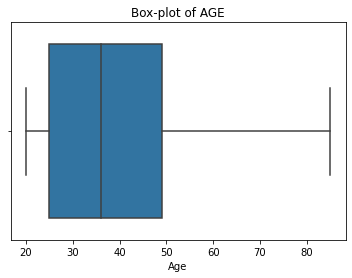

In [56]:
#Checking whether any outliers in 'Age' feature
sns.boxplot(df['Age'])
plt.title('Box-plot of AGE')
plt.show()

#There is no significant outliers in Age, so we are not considering AGE for outlier treatment

## Further Scope
#### Data processing
#### Transformation
#### Modelling
#### Hyper-parameter tuning
#### Recomendation

   # --------------------------------------------Thank You---------------------------------------------